## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
!pip install statsmodels

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [7]:
conversion_proportion = df['converted'].mean()
conversion_proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
mismatch_count = df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment') |
                    (df['landing_page'] != 'new_page') & (df['group'] == 'treatment')].shape[0]

mismatch_count

3893

f. Do any of the rows have missing values?

In [9]:
missing_values_exist = df.isnull().any(axis=1).any()
missing_values_exist

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) |
         ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
column_to_check = 'user_id'
duplicated_values = df2[df2.duplicated(subset=['user_id'], keep=False)]
print(duplicated_values)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [14]:
column_to_check = 'user_id'
duplicated_values = df2[df2.duplicated(subset=['user_id'], keep=False)]
print(duplicated_values)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df.drop_duplicates(subset=[column_to_check], keep='first')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
probability_of_conversion = df2['converted'].mean()
print(probability_of_conversion)

0.1195695564793657


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_group = df2[df2['group'] == 'control']
probability_of_conversion_control = control_group['converted'].mean()
print(probability_of_conversion_control)

0.12029717968491792


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
control_group = df2[df2['group'] == 'treatment']
probability_of_conversion_treatment = control_group['converted'].mean()
print(probability_of_conversion_treatment)

0.11884253398646046


d. What is the probability that an individual received the new page?

In [19]:
probability_of_new_page = (df2['landing_page'] == 'new_page').mean()
print(probability_of_new_page)

0.5000963576797071


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is not sufficient evidence to say if the new treatment page leads to more conversions and it may be a good idea to add more time to the experiment.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null and alternative hypotheses for this scenario can be stated as follows:

Null Hypothesis: The converted rate of the old page is greater than or equal to the converted rate of the new page.

Alternative Hypothesis: The converted rate of the new page is significantly better than the converted rate of the old page.

The null hypothesis assumes that the old page is as good as or better than the new page, while the alternative hypothesis suggests that the new page is significantly better in terms of conversion.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_overall = df['converted'].mean()

p_new_null = p_overall

print(p_new_null)

0.11965919355605512


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_overall = df['converted'].mean()

p_old_null = p_overall

print(p_old_null)

0.11965919355605512


c. What is $n_{new}$?

In [22]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

print(n_new)

145320


d. What is $n_{old}$?

In [23]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

print(n_old)

145264


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
p_new_null = df['converted'].mean()
n_new = df[df['landing_page'] == 'new_page'].shape[0]

new_page_converted = np.random.binomial(1, p_new_null, n_new)

print(new_page_converted)

[0 0 0 ... 1 1 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old_null, n_old)

print(old_page_converted)

[0 0 0 ... 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
observed_diff = new_page_converted.mean() - old_page_converted.mean()

print(observed_diff)

-0.0023879208305780247


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new_null, n_new)
    old_page_converted = np.random.binomial(1, p_old_null, n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

p_diffs = np.array(p_diffs)

print(p_diffs[:5])

[ 5.90876059e-04  8.28584818e-04 -6.92751241e-04  9.84793431e-04
  4.07500730e-05]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

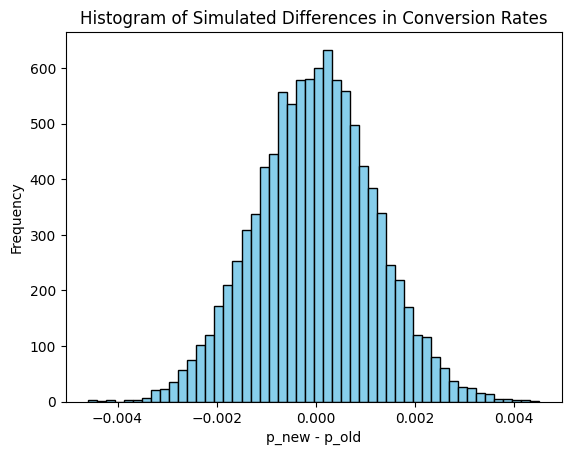

In [35]:
plt.hist(p_diffs, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Simulated Differences in Conversion Rates')
plt.xlabel('p_new - p_old')
plt.ylabel('Frequency')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
observed_diff = df[df['landing_page'] == 'new_page']['converted'].mean() - df[df['landing_page'] == 'old_page']['converted'].mean()

p_value = (p_diffs > observed_diff).mean()

print(p_value)

0.9119


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, we computed the p-value. The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one observed in the original data, assuming that the null hypothesis is true.

In scientific studies, the p-value is an important indicator in hypothesis testing. Here's what the computed p-value means for new vs old pages:

If the p-value is small (typically below a significance level, e.g., 0.05): We would reject the null hypothesis. This suggests that there is sufficient evidence to conclude that the new page has a statistically significant impact on conversion rates compared to the old page.

If the p-value is large: We would fail to reject the null hypothesis. This suggests that there is not enough evidence to claim a significant difference between the new and old pages in terms of conversion rates.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df[df['landing_page'] == 'old_page']['converted'].sum()
convert_new = df[df['landing_page'] == 'new_page']['converted'].sum()

n_old = df[df['landing_page'] == 'old_page'].shape[0]
n_new = df[df['landing_page'] == 'new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
convert_old = df[df['landing_page'] == 'old_page']['converted'].sum()
convert_new = df[df['landing_page'] == 'new_page']['converted'].sum()

n_old = df[df['landing_page'] == 'old_page'].shape[0]
n_new = df[df['landing_page'] == 'new_page'].shape[0]

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: 1.3683341399998907
P-value: 0.9143962454534289


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value from the previous question provide insights into the statistical significance of the difference in conversion rates between the old and new pages.

The z-score measures how many standard deviations an observed difference is from the expected difference under the null hypothesis. A positive z-score suggests that the observed difference is above the mean, while a negative z-score suggests it is below the mean.

The p-value represents the probability of observing a difference as extreme as, or more extreme than, the one observed, assuming the null hypothesis is true. A smaller p-value suggests stronger evidence against the null hypothesis.

Interpretation: If the p-value is less than a chosen significance level (e.g., 0.05), it indicates that the observed difference is statistically significant. A z-score greater than 1.96 (for a one-tailed test with a significance level of 0.05) also suggests statistical significance.

Comparing with the findings in parts j. and k.:If the p-value is small (typically below 0.05), we would reject the null hypothesis, suggesting a significant difference in conversion rates. If the z-score is far from 0 (greater than 1.96 for a one-tailed test), it also supports the rejection of the null hypothesis. The results from parts j. and k., where we calculated the p-value through simulation, should align with the results obtained using stats.proportions_ztest. If both approaches lead to the same conclusion, it strengthens the evidence for or against the hypothesis that the new page has a different conversion rate compared to the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In this case, where the outcome variable is binary (conversion or no conversion), logistic regression should be performed. Logistic regression is appropriate for modeling binary outcomes and is well-suited for A/B testing scenarios where the goal is to understand the relationship between a categorical variable (such as the landing page) and the probability of a binary outcome (such as conversion or no conversion).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [59]:
df['intercept'] = 1

df['ab_page'] = pd.get_dummies(df['group'])['treatment']

print(df.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1    False  
1          1    False  
2          1     True  
3          1     True  
4          1    False  


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
import statsmodels.api as sm

df['converted'] = pd.to_numeric(df['converted'], errors='coerce')

df['ab_page'] = df['ab_page'].astype(int)

df['intercept'] = 1

logit_model = sm.Logit(df['converted'], df[['intercept', 'ab_page']])

results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:               7.093e-06
Time:                        13:27:44   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with the 'ab_page' variable in the logistic regression model is 0.216.

In logistic regression:

Null Hypothesis (H0): There is no relationship between the independent variable (ab_page) and the dependent variable (conversion).
Alternative Hypothesis (H1): There is a relationship between the independent variable (ab_page) and the dependent variable (conversion).
The p-value associated with 'ab_page' is 0.216, which is greater than the commonly used significance level of 0.05. Therefore, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that there is a significant relationship between the page type (new or old) and the conversion rate.

In Part II, the p-value was associated with a hypothesis test for the difference in conversion rates between the old and new pages. The null and alternative hypotheses were:

Null Hypothesis (H0): The conversion rate of the old page is equal to or better than the conversion rate of the new page.
Alternative Hypothesis (H1): The conversion rate of the old page is worse than the conversion rate of the new page.
The p-value calculated in Part II was used to make a decision about whether to reject the null hypothesis in favor of the alternative hypothesis. The smaller the p-value, the stronger the evidence against the null hypothesis. In Part II, the p-value was used to assess whether the new page led to a significantly different conversion rate compared to the old page.

The difference in the p-values between Part II and the logistic regression results may be due to differences in the hypothesis tested and the nature of the analysis. In logistic regression, the focus is on the relationship between variables, while in Part II, the focus is on the comparison of conversion rates between pages.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors in the regression model is a good idea because it allows for a more comprehensive analysis of the factors that might influence whether or not an individual converts. Including additional variables can provide a more nuanced and realistic understanding of the relationship between the dependent and independent variables. Here are some reasons why it's beneficial:

Increased Model Accuracy: Additional variables might capture variation in the dependent variable that the original variable (ab_page in this case) does not account for. This can lead to a more accurate and reliable model.

Control for Confounding Variables: Including other relevant variables allows for the control of potential confounding factors, which are variables that are not of primary interest but may impact the relationship between the independent and dependent variables. Controlling for confounding variables helps to isolate the effect of the variable of interest.

Identify Interaction Effects: The inclusion of interaction terms allows for the exploration of whether the effect of one variable on the dependent variable depends on the level of another variable.

However, there are also potential disadvantages to adding additional terms to the regression model:

Overfitting: Including too many variables in the model, especially if the sample size is limited, may lead to overfitting. Overfitting occurs when the model fits the noise in the data rather than the underlying patterns, resulting in poor generalization to new data.

Multicollinearity: If additional variables are highly correlated with each other, it can lead to multicollinearity. Multicollinearity makes it difficult to isolate the individual effects of each variable, and it can result in unstable coefficient estimates.

Interpretability: As the number of variables increases, the interpretation of coefficients becomes more complex. It may become challenging to discern the specific impact of each variable on the dependent variable.

Data Requirements: Including additional variables requires more data. If the dataset is small, it may not have enough statistical power to detect meaningful effects.

Therefore, it's important to strike a balance between model complexity and simplicity, considering the trade-off between improved fit and increased risk of overfitting or other issues. The selection of additional variables should be guided by a combination of statistical methods, domain knowledge, and the specific research question. Regular diagnostic checks, such as assessing multicollinearity and model fit, are essential in evaluating the performance of the regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [101]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [87]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

print(df_new.head())

        country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted     CA     UK     US  intercept  
user_id                                             
834778           0  False   True  False          1  
928468           0  False  False   True          1  
822059           1  False   True  False          1  
711597           0  False   True  False          1  
710616           0  False   True  False          1  


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [98]:
df_new[['ab_page', 'CA', 'UK', 'US', 'ab_page_CA', 'ab_page_UK', 'ab_page_US']] = df_new[['ab_page', 'CA', 'UK', 'US', 'ab_page_CA', 'ab_page_UK', 'ab_page_US']].astype(int)

print(df_new.dtypes)

country                 object
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
ab_page                  int64
intercept                int64
CA                       int64
UK                       int64
US                       int64
ab_page_CA               int64
ab_page_UK               int64
ab_page_US               int64
dtype: object


In [99]:
logit_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'ab_page_CA', 'ab_page_UK']])
results = logit_model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366056
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:               2.826e-05
Time:                        14:08:44   Log-Likelihood:            -1.0637e+05
converged:                       True   LL-Null:                   -1.0637e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3049
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9881      0.010   -206.359      0.000      -2.007      -1.969
ab_page       -0.0182      0.

Conclusion: The p-values for the interaction terms (ab_page_CA and ab_page_UK) are relatively high, indicating that they are not statistically significant. Therefore, there is no strong evidence to suggest that the interaction between page and country has a significant effect on the conversion rate.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.